### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing File

In [2]:
df = pd.read_excel('flight_price.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# get teh basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
# FE
# 1. Date_of_journey

df['Day'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [7]:
df.info() # date day and year still in object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [8]:
# typecasting
df['Day'] = df['Day'].astype('Int64')
df['Month'] = df['Month'].astype('Int64')
df['Year'] = df['Year'].astype('Int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  Int64 
 12  Month            10683 non-null  Int64 
 13  Year             10683 non-null  Int64 
dtypes: Int64(3), int64(1), object(10)
memory usage: 1.2+ MB


In [10]:
# now we can drop the original date column
df.drop('Date_of_Journey',axis=1,inplace=True)

In [11]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [12]:
# Arrival Time FE
df['Arrival_Time']= df['Arrival_Time'].str.split(' ').str[0]
""" 
It can also be done by
df['Arrival_Time].apply(lambda x:x.split(' ').str[0])
"""

" \nIt can also be done by\ndf['Arrival_Time].apply(lambda x:x.split(' ').str[0])\n"

In [13]:
df['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [14]:
# Arrival Time
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]

In [15]:
df['Arrival_Hour']

0        01
1        13
2        04
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Hour, Length: 10683, dtype: object

In [16]:
df['Arrival_Minutes']= df['Arrival_Time'].str.split(':').str[1]

In [17]:
df['Arrival_Minutes'] # this minute section is now giving a problem so we can split the time first which is done above

0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_Minutes, Length: 10683, dtype: object

In [18]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [19]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype('Int64')
df['Arrival_Minutes'] = df['Arrival_Minutes'].astype('Int64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  Int64 
 11  Month            10683 non-null  Int64 
 12  Year             10683 non-null  Int64 
 13  Arrival_Hour     10683 non-null  Int64 
 14  Arrival_Minutes  10683 non-null  Int64 
dtypes: Int64(5), int64(1), object(9)
memory usage: 1.3+ MB


In [21]:
# Departure Time
df['Dep_Hour']= df['Dep_Time'].str.split(':').str[0]
df['Dep_Minutes']= df['Dep_Time'].str.split(':').str[1]

In [22]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  Int64 
 11  Month            10683 non-null  Int64 
 12  Year             10683 non-null  Int64 
 13  Arrival_Hour     10683 non-null  Int64 
 14  Arrival_Minutes  10683 non-null  Int64 
 15  Dep_Hour         10683 non-null  object
 16  Dep_Minutes      10683 non-null  object
dtypes: Int64(5), int64(1), object(1

In [24]:
df['Dep_Hour']= df['Dep_Hour'].astype('Int64')
df['Dep_Minutes']= df['Dep_Minutes'].astype('Int64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  Int64 
 11  Month            10683 non-null  Int64 
 12  Year             10683 non-null  Int64 
 13  Arrival_Hour     10683 non-null  Int64 
 14  Arrival_Minutes  10683 non-null  Int64 
 15  Dep_Hour         10683 non-null  Int64 
 16  Dep_Minutes      10683 non-null  Int64 
dtypes: Int64(7), int64(1), object(9

In [26]:
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Day              10683 non-null  Int64 
 9   Month            10683 non-null  Int64 
 10  Year             10683 non-null  Int64 
 11  Arrival_Hour     10683 non-null  Int64 
 12  Arrival_Minutes  10683 non-null  Int64 
 13  Dep_Hour         10683 non-null  Int64 
 14  Dep_Minutes      10683 non-null  Int64 
dtypes: Int64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [28]:
# Total Stops
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [29]:
# Nan
df['Total_Stops'].isnull().value_counts()

Total_Stops
False    10682
True         1
Name: count, dtype: int64

In [30]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [31]:
# giving ordinal values to 'non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

In [32]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [33]:
df['Total_Stops'].head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: int64

In [34]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10683 non-null  int64 
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Day              10683 non-null  Int64 
 9   Month            10683 non-null  Int64 
 10  Year             10683 non-null  Int64 
 11  Arrival_Hour     10683 non-null  Int64 
 12  Arrival_Minutes  10683 non-null  Int64 
 13  Dep_Hour         10683 non-null  Int64 
 14  Dep_Minutes      10683 non-null  Int64 
dtypes: Int64(7), int64(2), object(6)
memory usage: 1.3+ MB


In [35]:
df['Duration_Hours']= df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_Minutes']= df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [36]:
df[['Duration_Hours','Duration_Minutes']]

,Duration_Hours,Duration_Minutes
0,2,50
1,7,25
2,19,NaN
3,5,25
4,4,45
...,...,...
10678,2,30
10679,2,35
10680,3,NaN
10681,2,40


In [37]:
df['Duration_Hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [38]:
df['Duration_Hours'] = pd.to_numeric(df['Duration_Hours'].str.replace('m', ''), errors='coerce') ## CHATGPT SE TEPA HAI

In [39]:
df['Duration_Hours']= df['Duration_Hours'].astype('Int64')
df['Duration_Minutes']= df['Duration_Minutes'].astype('Int64')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  object
 5   Total_Stops       10683 non-null  int64 
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Day               10683 non-null  Int64 
 9   Month             10683 non-null  Int64 
 10  Year              10683 non-null  Int64 
 11  Arrival_Hour      10683 non-null  Int64 
 12  Arrival_Minutes   10683 non-null  Int64 
 13  Dep_Hour          10683 non-null  Int64 
 14  Dep_Minutes       10683 non-null  Int64 
 15  Duration_Hours    10683 non-null  Int64 
 16  Duration_Minutes  9651 non-null   Int64 
dtypes: Int64(9),

In [41]:
#df['Duration_Minutes']= df['Duration_Minutes'].map({np.nan:0})
df['Duration_Minutes'].unique()

<IntegerArray>
[50, 25, <NA>, 45, 30, 5, 15, 35, 10, 20, 55, 40]
Length: 12, dtype: Int64

In [42]:
df['Duration_Minutes']= df['Duration_Minutes'].fillna(0)

In [43]:
df['Duration_Minutes'].unique()

<IntegerArray>
[50, 25, 0, 45, 30, 5, 15, 35, 10, 20, 55, 40]
Length: 12, dtype: Int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  object
 5   Total_Stops       10683 non-null  int64 
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Day               10683 non-null  Int64 
 9   Month             10683 non-null  Int64 
 10  Year              10683 non-null  Int64 
 11  Arrival_Hour      10683 non-null  Int64 
 12  Arrival_Minutes   10683 non-null  Int64 
 13  Dep_Hour          10683 non-null  Int64 
 14  Dep_Minutes       10683 non-null  Int64 
 15  Duration_Hours    10683 non-null  Int64 
 16  Duration_Minutes  10683 non-null  Int64 
dtypes: Int64(9),

In [45]:
df.drop('Duration',axis=1,inplace=True)

In [46]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [47]:
df.drop('Route',axis=1,inplace=True)
df.drop('Additional_Info',axis=1,inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Total_Stops       10683 non-null  int64 
 4   Price             10683 non-null  int64 
 5   Day               10683 non-null  Int64 
 6   Month             10683 non-null  Int64 
 7   Year              10683 non-null  Int64 
 8   Arrival_Hour      10683 non-null  Int64 
 9   Arrival_Minutes   10683 non-null  Int64 
 10  Dep_Hour          10683 non-null  Int64 
 11  Dep_Minutes       10683 non-null  Int64 
 12  Duration_Hours    10683 non-null  Int64 
 13  Duration_Minutes  10683 non-null  Int64 
dtypes: Int64(9), int64(2), object(3)
memory usage: 1.2+ MB


In [49]:
# NOW USING THE ONEHOTENCODER FOR 0,1,2
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [50]:
encoded = encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

In [51]:
abc = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [52]:
abc.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline_Air Asia                           10683 non-null  float64
 1   Airline_Air India                          10683 non-null  float64
 2   Airline_GoAir                              10683 non-null  float64
 3   Airline_IndiGo                             10683 non-null  float64
 4   Airline_Jet Airways                        10683 non-null  float64
 5   Airline_Jet Airways Business               10683 non-null  float64
 6   Airline_Multiple carriers                  10683 non-null  float64
 7   Airline_Multiple carriers Premium economy  10683 non-null  float64
 8   Airline_SpiceJet                           10683 non-null  float64
 9   Airline_Trujet                             10683 non-null  float64
 10  Airline_Vistara       

In [53]:
df.drop('Airline',axis=1,inplace=True)
df.drop('Source',axis=1,inplace=True)
df.drop('Destination',axis=1,inplace=True)

In [54]:
df

,Total_Stops,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes,Duration_Hours,Duration_Minutes
0,0,3897,24,3,2019,1,10,22,20,2,50
1,2,7662,1,5,2019,13,15,5,50,7,25
2,2,13882,9,6,2019,4,25,9,25,19,0
3,1,6218,12,5,2019,23,30,18,5,5,25
4,1,13302,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,22,25,19,55,2,30
10679,0,4145,27,4,2019,23,20,20,45,2,35
10680,0,7229,27,4,2019,11,20,8,20,3,0
10681,0,12648,1,3,2019,14,10,11,30,2,40


In [55]:
abc

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
Final_EDA = pd.concat([abc,df],axis=1)

In [57]:
Final_EDA

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Dep_Hour,Dep_Minutes,Duration_Hours,Duration_Minutes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3897,24,3,2019,1,10,22,20,2,50
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7662,1,5,2019,13,15,5,50,7,25
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13882,9,6,2019,4,25,9,25,19,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6218,12,5,2019,23,30,18,5,5,25
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13302,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4107,9,4,2019,22,25,19,55,2,30
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4145,27,4,2019,23,20,20,45,2,35
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7229,27,4,2019,11,20,8,20,3,0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12648,1,3,2019,14,10,11,30,2,40


### Now our Data is ready to give it into the model

In [ ]:
Final_EDA.to_excel("Flight_EDA.xlsx")  # Saving Clean Data 

### Visualizing 

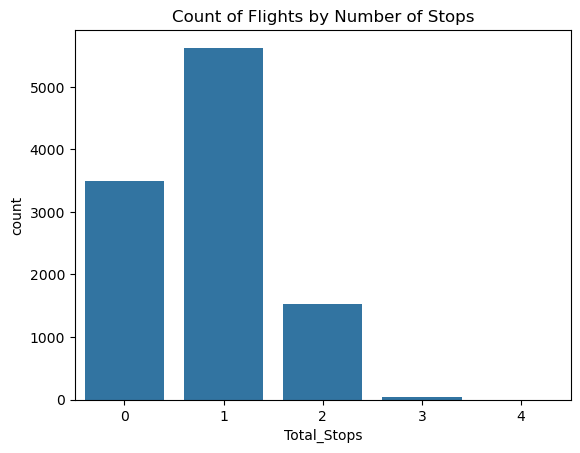

In [60]:
sns.countplot(x='Total_Stops', data=df)
plt.title('Count of Flights by Number of Stops')
plt.show()

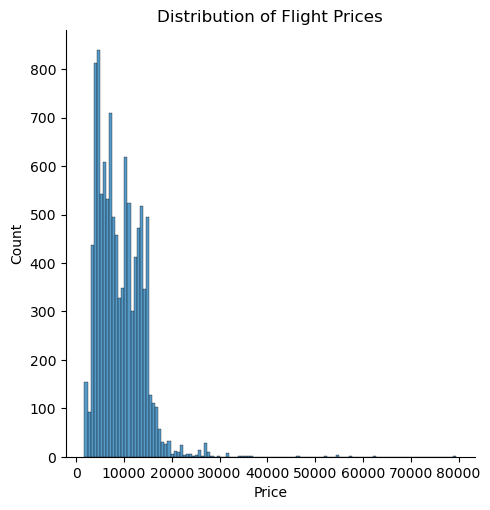

In [65]:
sns.displot(df['Price'])
plt.title('Distribution of Flight Prices')
plt.show()

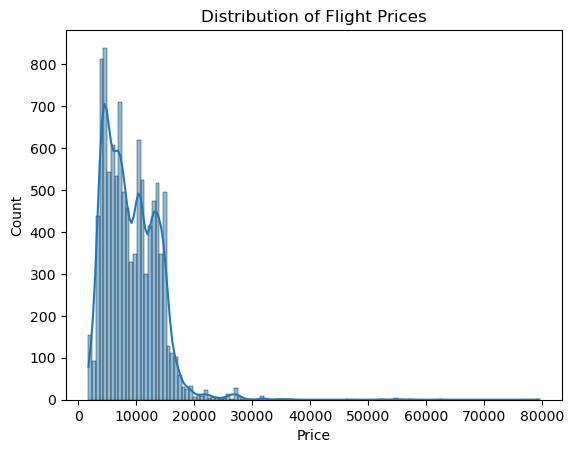

In [63]:
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.show()


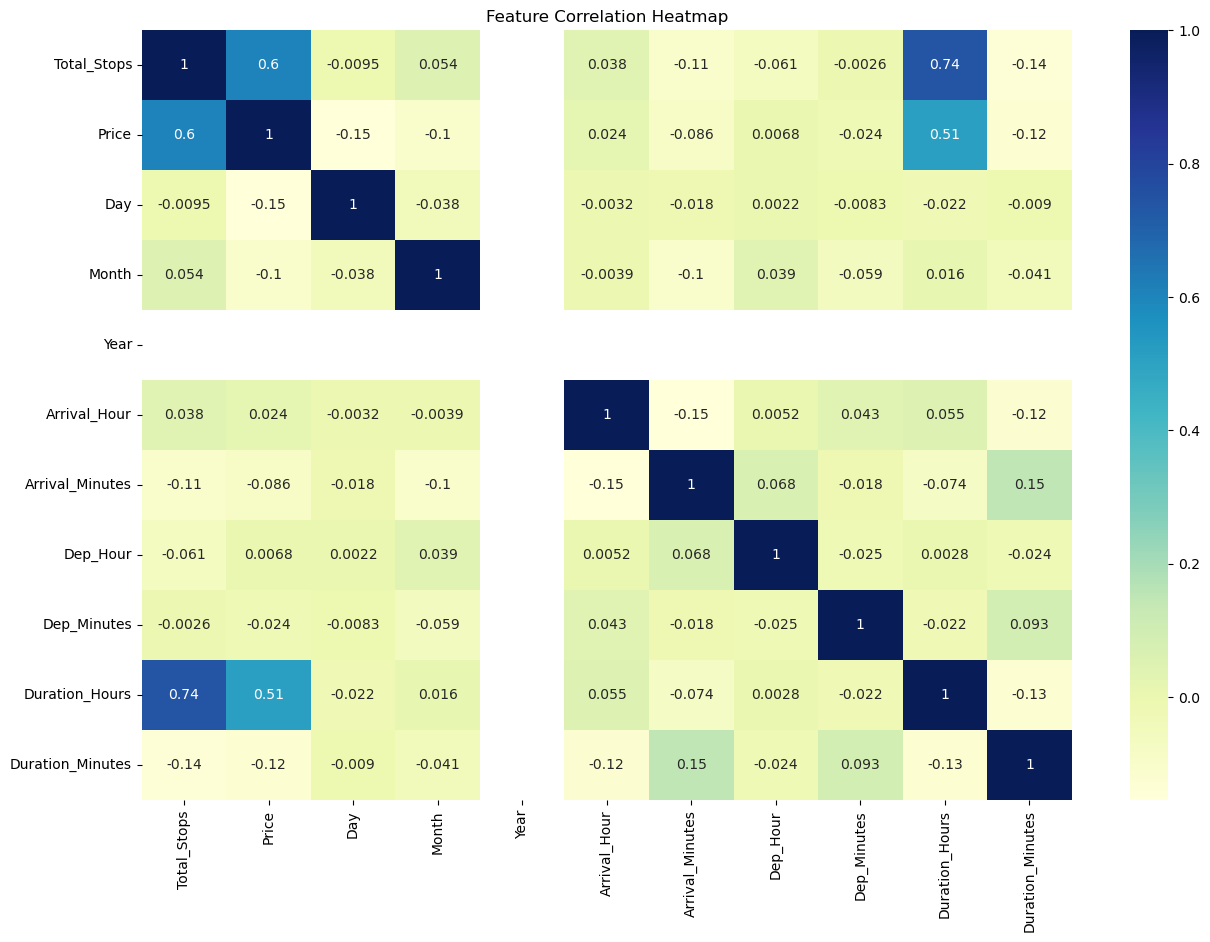

In [64]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Feature Correlation Heatmap')
plt.show()